# Ejercicio: Análisis de Regresión con el Dataset Wine Quality

## Descripción del Dataset

El dataset **Wine Quality** contiene resultados de análisis fisicoquímicos de vinos portugueses "Vinho Verde" y su calidad evaluada por expertos. El objetivo es predecir la calidad del vino basándose en sus propiedades químicas.

### Variables del dataset:
- **fixed acidity**: Acidez fija (g/L de ácido tartárico)
- **volatile acidity**: Acidez volátil (g/L de ácido acético)
- **citric acid**: Ácido cítrico (g/L)
- **residual sugar**: Azúcar residual (g/L)
- **chlorides**: Cloruros (g/L de cloruro de sodio)
- **free sulfur dioxide**: Dióxido de azufre libre (mg/L)
- **total sulfur dioxide**: Dióxido de azufre total (mg/L)
- **density**: Densidad (g/cm³)
- **pH**: pH del vino
- **sulphates**: Sulfatos (g/L de sulfato de potasio)
- **alcohol**: Contenido de alcohol (% vol)
- **quality**: Calidad del vino (puntuación de 0-10) - **Variable objetivo**

En este ejercicio, trabajarás con el dataset de vinos tintos y aplicarás diferentes técnicas de regresión para predecir la calidad del vino.

## 1. Importar librerías y cargar datos

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [2]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. Análisis Exploratorio de Datos (EDA)

### Ejercicio 2.1: Exploración inicial
Completa el análisis exploratorio inicial del dataset.

In [3]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# TODO: Muestra la información general del dataset (tipos de datos, valores no nulos)
# Tu código aquí
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# TODO: Calcula y muestra las estadísticas descriptivas del dataset
# Tu código aquí
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# TODO: Verifica si hay valores nulos en el dataset
# Tu código aquí
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Ejercicio 2.2: Análisis de la variable objetivo

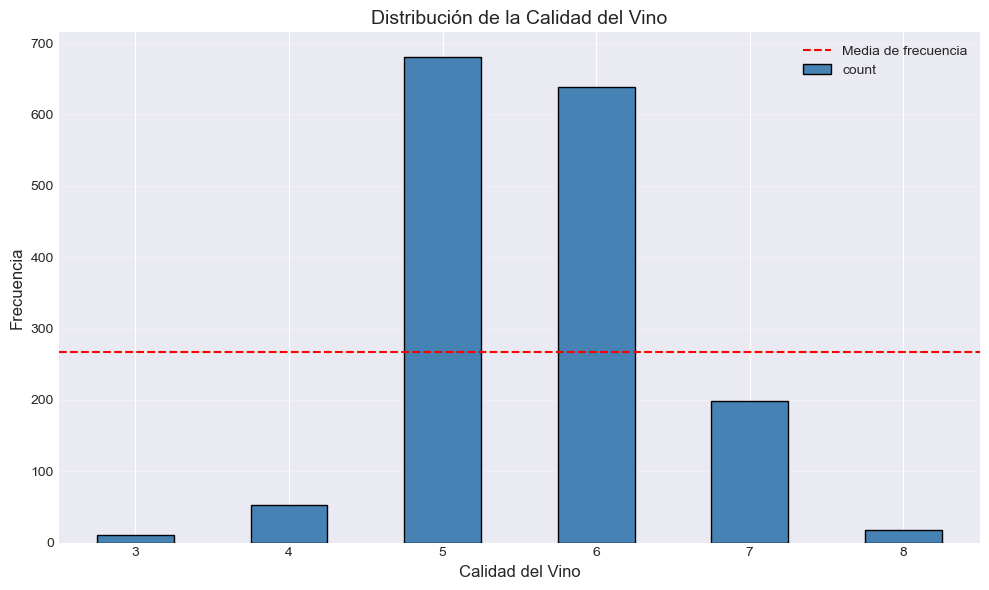

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [7]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

### Ejercicio 2.3: Matriz de correlación

<Axes: >

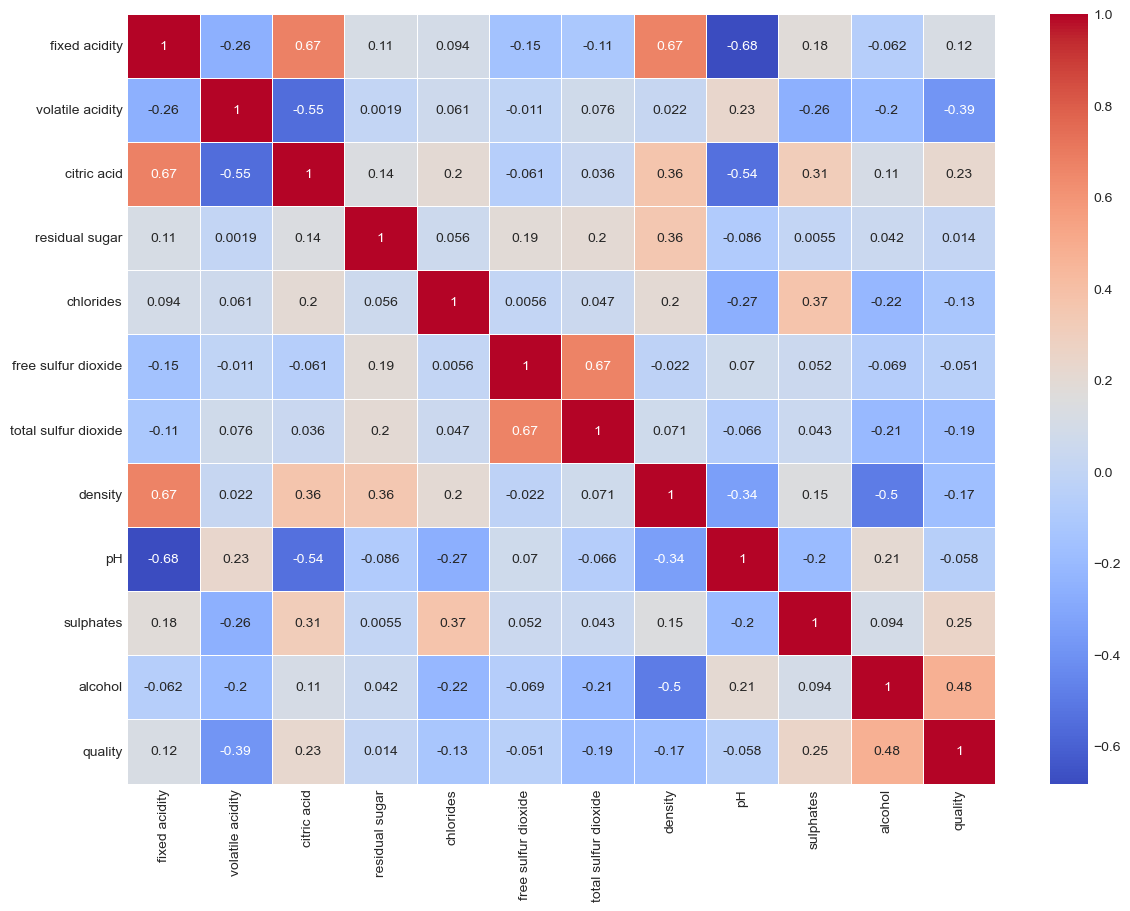

In [8]:
# TODO: Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
# Tu código aquí

plt.figure(figsize=(14, 10))
# Completa el código para crear el heatmap
sns.heatmap(wine_data.corr(), annot=True, linewidths=0.5, cmap="coolwarm")

quality           1.000000
alcohol           0.476166
sulphates         0.251397
citric acid       0.226373
fixed acidity     0.124052
residual sugar    0.013732
Name: quality, dtype: float64


<Axes: >

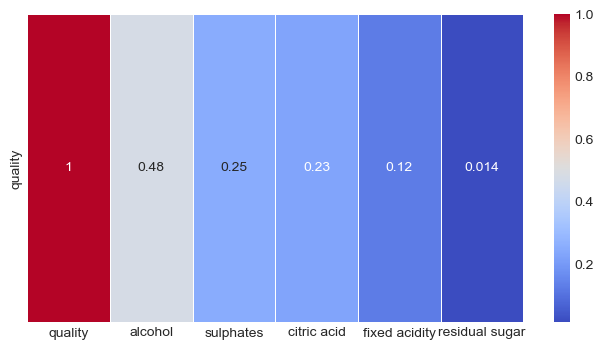

In [9]:
# TODO: Identifica y muestra las 5 variables más correlacionadas con 'quality'
# Tu código aquí
top_quality_corr = wine_data.corr()['quality'].sort_values(ascending=False).head(6)
print(top_quality_corr)

plt.figure(figsize=(8, 4))
sns.heatmap(top_quality_corr.to_frame().T, annot=True, cmap='coolwarm', linewidths=0.5)

### Ejercicio 2.4: Visualización de relaciones

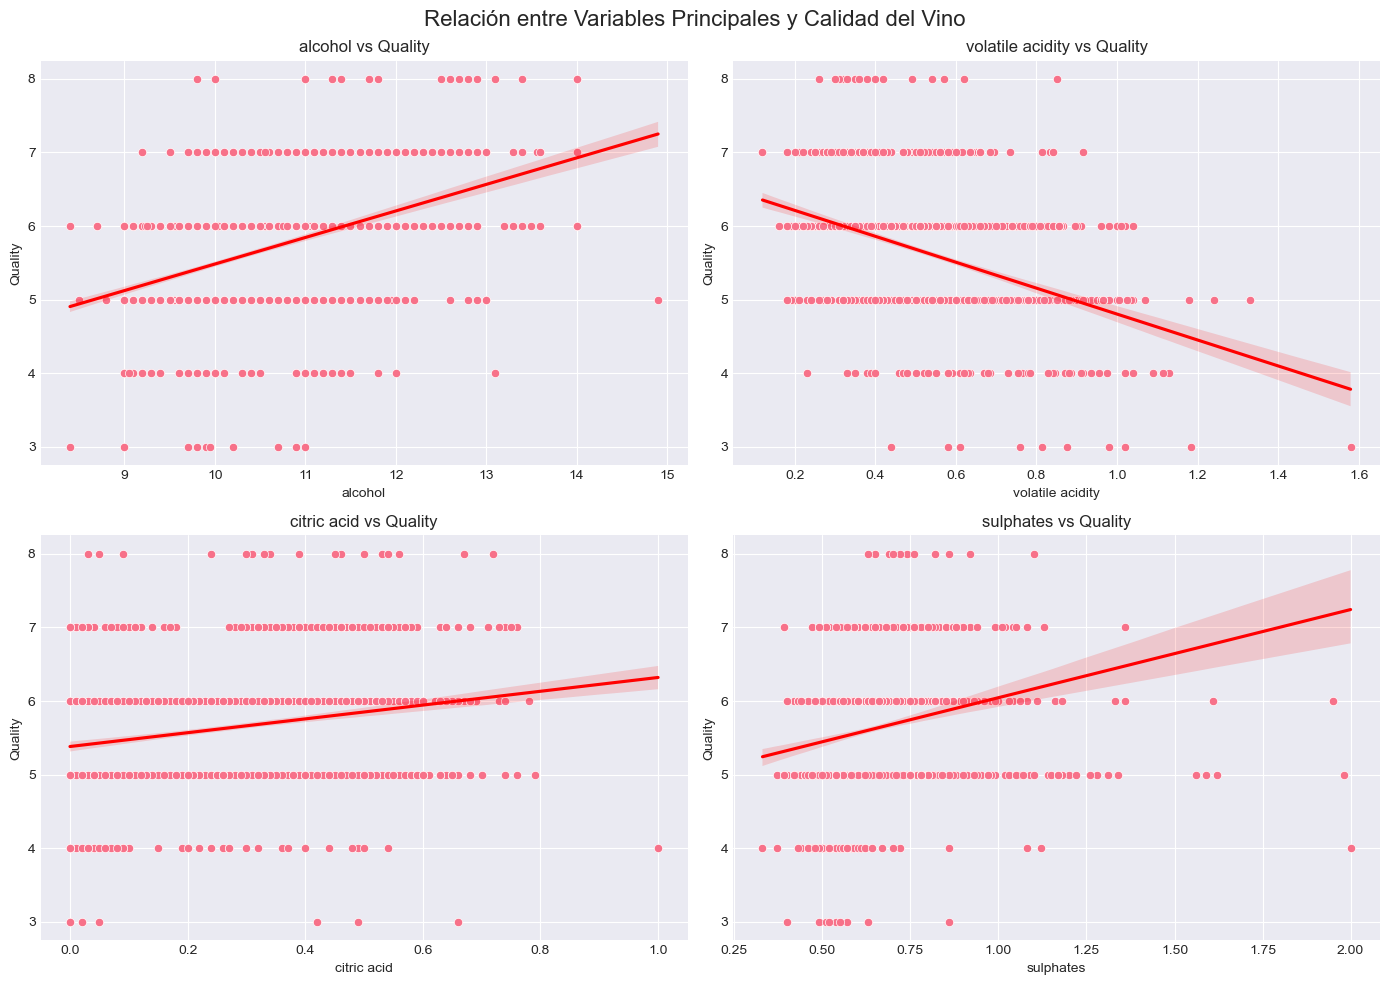

In [10]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # TODO: Crea un scatter plot para cada variable vs quality
    sns.scatterplot(data=wine_data, x=feature, y="quality", ax=ax)
    ax.set_title(f"{feature} vs Quality")
    # Agrega una línea de tendencia
    sns.regplot(data=wine_data, x=feature, y="quality", scatter=False, ax=ax, color='red')
    # Tu código aquí
    ax.set_xlabel(feature)
    ax.set_ylabel("Quality")
    pass

plt.tight_layout()
plt.show()

## 3. Preparación de Datos

In [11]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [12]:
# TODO: Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42
# Tu código aquí

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 1279
Tamaño del conjunto de prueba: 320


In [13]:
# TODO: Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento
# Tu código aquí

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Validación Cruzada para Selección de Hiperparámetros

La validación cruzada es fundamental para seleccionar los mejores hiperparámetros sin usar el conjunto de prueba.

### Ejercicio 4.1: Implementación manual de validación cruzada

In [14]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# TODO: Identifica el mejor alpha basado en el RMSE medio más bajo
# Tu código aquí
print(f"\nMin RMSE:\n{pd.DataFrame(cv_results_manual).loc[lambda df: df['mean_rmse'] == df['mean_rmse'].min()]}")

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)

Min RMSE:
   alpha  mean_rmse  std_rmse
5  100.0   0.659916  0.013947


### Ejercicio 4.2: Usar RidgeCV para validación cruzada automática

In [15]:
cv_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
alphas = np.logspace(-3, 3, 100)
best_rmse = float('inf')
best_cv = None
best_alpha = None
for cv_fold in cv_values:
    for alpha in alphas:
        ridge_cv = RidgeCV(alphas=[alpha], cv=cv_fold)
        ridge_cv.fit(X_train, y_train)
        y_pred = ridge_cv.predict(X_train)
        rmse = np.sqrt(mean_squared_error(y_train, y_pred))
        if rmse < best_rmse:
            best_rmse = rmse
            best_cv = cv_fold
            best_alpha = alpha
print(f"Mejor cv: {best_cv}")
print(f"Mejor alpha encontrado: {best_alpha}")
print(f"Mejor RMSE: {best_rmse:.4f}")

Mejor cv: 2
Mejor alpha encontrado: 0.001
Mejor RMSE: 0.6513


### Ejercicio 4.3: GridSearchCV para búsqueda exhaustiva

In [16]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# TODO: Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'
# Tu código aquí

grid_search_ridge = GridSearchCV(ridge_base, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Mejor score (RMSE): {-grid_search_ridge.best_score_:.4f}")

Mejor alpha: 0.3359818286283781
Mejor score (RMSE): 0.4392


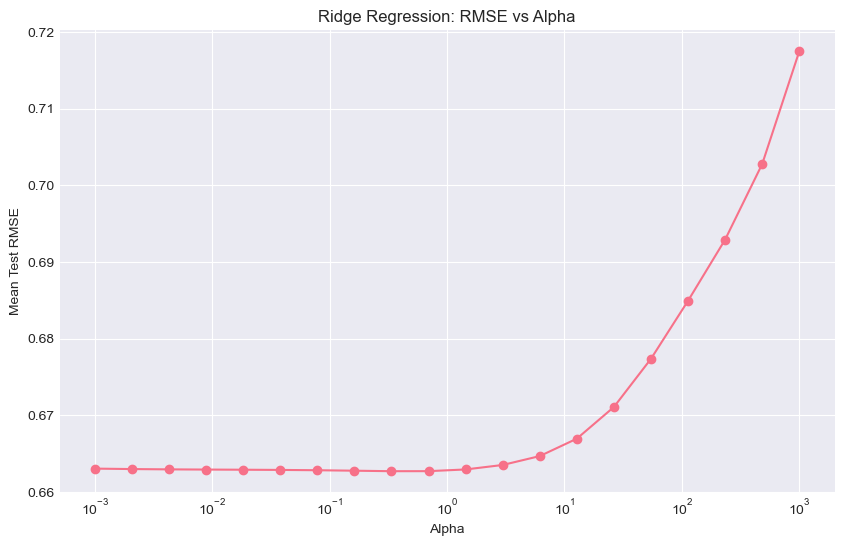

In [17]:
# TODO: Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha
# Tu código aquí

plt.figure(figsize=(10, 6))
# Completa el código para visualizar los resultados
results_df = pd.DataFrame(grid_search_ridge.cv_results_)
results_df['mean_test_rmse'] = np.sqrt(-results_df['mean_test_score'])
plt.semilogx(results_df['param_alpha'], results_df['mean_test_rmse'], marker='o')
plt.xlabel('Alpha')
plt.ylabel('Mean Test RMSE')
plt.title('Ridge Regression: RMSE vs Alpha')
plt.grid(True)
plt.show()


## 5. Modelos de Regresión

### 5.1 Regresión Lineal Normal

In [18]:
# TODO: Implementa y entrena un modelo de regresión lineal
# Tu código aquí

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Calcular métricas
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

r2_lr_test = r2_score(y_test, y_pred_lr_test)

print("Regresión Lineal Normal:")
print(f"RMSE Train: {rmse_lr_train:.4f}")
print(f"RMSE Test: {rmse_lr_test:.4f}")
print(f"R² Train: {r2_lr_train:.4f}")
print(f"R² Test: {r2_lr_test:.4f}")

Regresión Lineal Normal:
RMSE Train: 0.6513
RMSE Test: 0.6245
R² Train: 0.3480
R² Test: 0.4032


### 5.2 Ridge Regression con mejor alpha de CV

In [19]:
# TODO: Entrena Ridge con el mejor alpha encontrado por validación cruzada
# Tu código aquí

best_alpha_ridge = results_df['param_alpha'][results_df['mean_test_rmse'].idxmin()]
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Predicciones y métricas
y_pred_ridge_train = ridge_model.predict(X_train)
y_pred_ridge_test = ridge_model.predict(X_test)

# Calcular métricas
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

print("Regresión Ridge:")
print(f"RMSE Train: {rmse_ridge_train:.4f}")
print(f"RMSE Test: {rmse_ridge_test:.4f}")
print(f"R² Train: {r2_ridge_train:.4f}")
print(f"R² Test: {r2_ridge_test:.4f}")

Regresión Ridge:
RMSE Train: 0.6514
RMSE Test: 0.6256
R² Train: 0.3477
R² Test: 0.4011


### 5.3 Lasso Regression con validación cruzada

In [20]:
# TODO: Implementa LassoCV para encontrar el mejor alpha automáticamente
# Tu código aquí

alphas_lasso = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5)
lasso_cv.fit(X_train, y_train)

print(f"Mejor alpha para Lasso: {lasso_cv.alpha_}")
print(f"Número de características seleccionadas: {np.sum(lasso_cv.coef_ != 0)}")

# Predicciones y métricas
y_pred_lasso_train = lasso_cv.predict(X_train)
y_pred_lasso_test = lasso_cv.predict(X_test)

# Calcular métricas
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train) 
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print("Regresión Lasso:")
print(f"RMSE Train: {rmse_lasso_train:.4f}")
print(f"RMSE Test: {rmse_lasso_test:.4f}")
print(f"R² Train: {r2_lasso_train:.4f}")
print(f"R² Test: {r2_lasso_test:.4f}")

Mejor alpha para Lasso: 0.001
Número de características seleccionadas: 9
Regresión Lasso:
RMSE Train: 0.6520
RMSE Test: 0.6280
R² Train: 0.3465
R² Test: 0.3966


In [21]:
# TODO: Identifica qué características fueron eliminadas por Lasso
# Tu código aquí
lasso_coefficients = pd.Series(lasso_cv.coef_, index=X.columns)
print("Coeficientes de Lasso:")
print(lasso_coefficients)

Coeficientes de Lasso:
fixed acidity           0.017714
volatile acidity       -0.988279
citric acid            -0.077182
residual sugar         -0.000000
chlorides              -1.221727
free sulfur dioxide     0.005817
total sulfur dioxide   -0.003626
density                -0.000000
pH                     -0.310294
sulphates               0.728819
alcohol                 0.294120
dtype: float64


## 6. Comparación de Modelos

In [22]:
# TODO: Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test
# Tu código aquí

comparison_data = {
    'Modelo': ['Lasso'],
    'RMSE Train': [rmse_lasso_train],
    'RMSE Test': [rmse_lasso_test],
    'R² Train': [r2_lasso_train],
    'R² Test': [r2_lasso_test],
    'MAE Test': [mean_absolute_error(y_test, y_pred_lasso_test)]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

  Modelo  RMSE Train  RMSE Test  R² Train   R² Test  MAE Test
0  Lasso    0.652045   0.627953  0.346499  0.396601   0.50674


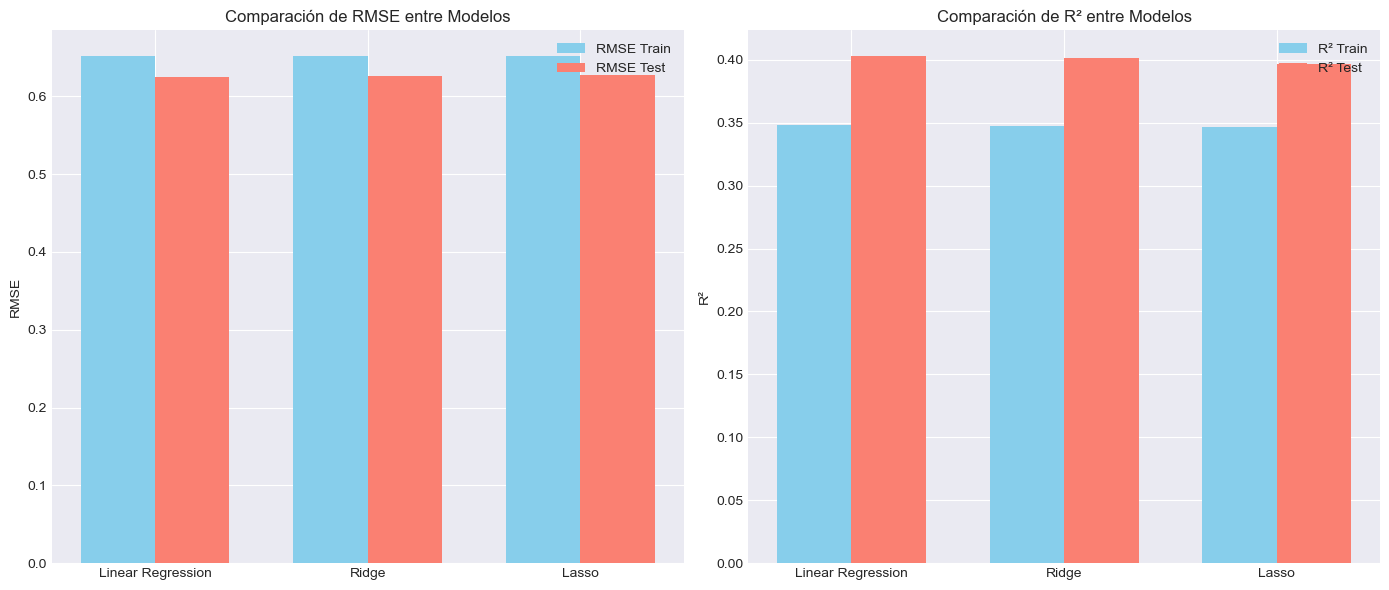

In [23]:
# TODO: Crea visualizaciones para comparar los modelos
# 1. Gráfico de barras comparando RMSE
# 2. Gráfico de barras comparando R²
# Tu código aquí
models = ['Linear Regression', 'Ridge', 'Lasso']
rmse_train = [rmse_lr_train, rmse_ridge_train, rmse_lasso_train]
rmse_test = [rmse_lr_test, rmse_ridge_test, rmse_lasso_test]
r2_train = [r2_lr_train, r2_ridge_train, r2_lasso_train]
r2_test = [r2_lr_test, r2_ridge_test, r2_lasso_test]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# RMSE Bar Plot
ax[0].bar(x - width/2, rmse_train, width, label='RMSE Train', color='skyblue')
ax[0].bar(x + width/2, rmse_test, width, label='RMSE Test', color='salmon')
ax[0].set_ylabel('RMSE')
ax[0].set_title('Comparación de RMSE entre Modelos')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)
ax[0].legend()
# R² Bar Plot
ax[1].bar(x - width/2, r2_train, width, label='R² Train', color='skyblue')
ax[1].bar(x + width/2, r2_test, width, label='R² Test', color='salmon')
ax[1].set_ylabel('R²')
ax[1].set_title('Comparación de R² entre Modelos')
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)
ax[1].legend()
plt.tight_layout()
plt.show()

## 7. Análisis de Residuos

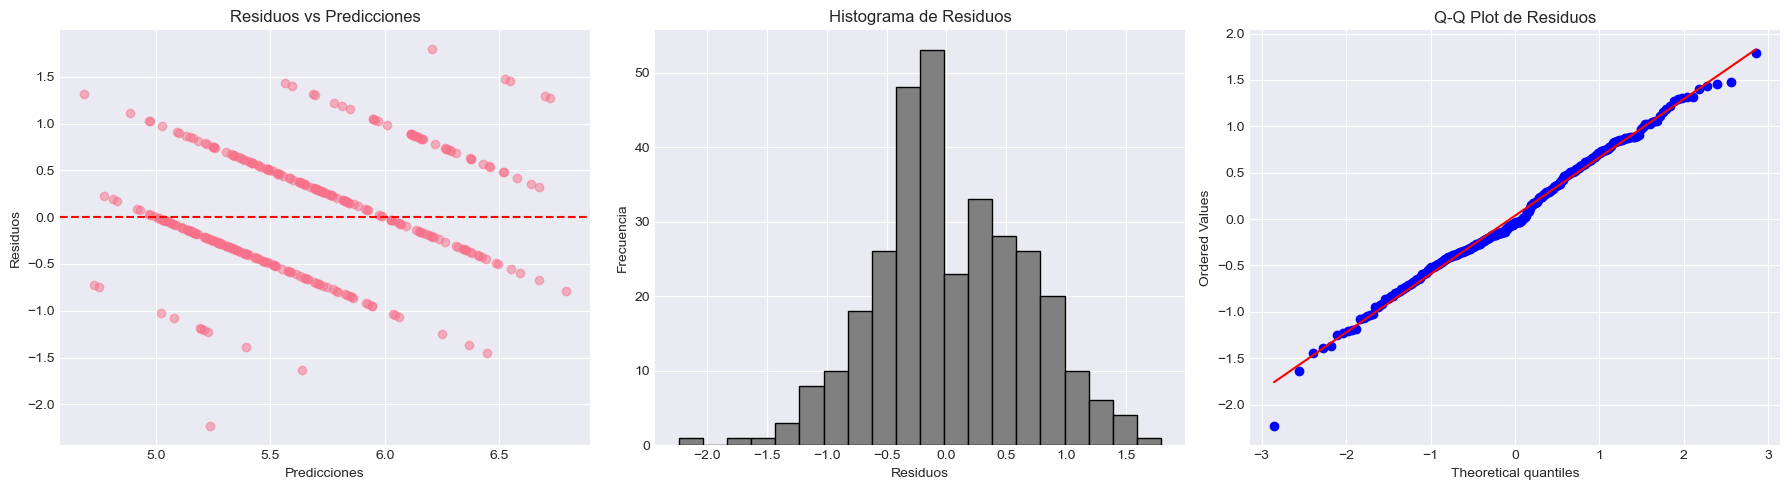

In [24]:
# TODO: Para el mejor modelo, crea:
# 1. Gráfico de residuos vs predicciones
# 2. Histograma de residuos
# 3. Q-Q plot de residuos
# Tu código aquí
best_model = lasso_cv  # Asumiendo que Lasso es el mejor modelo
y_pred_best = y_pred_lasso_test
residuals = y_test - y_pred_best
import scipy.stats as stats
# Residuals vs Predictions
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
# Histogram of Residuals
plt.subplot(1, 3, 2)
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
# Q-Q Plot
plt.subplot(1, 3, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.tight_layout()
plt.show()


## 8. Importancia de Características

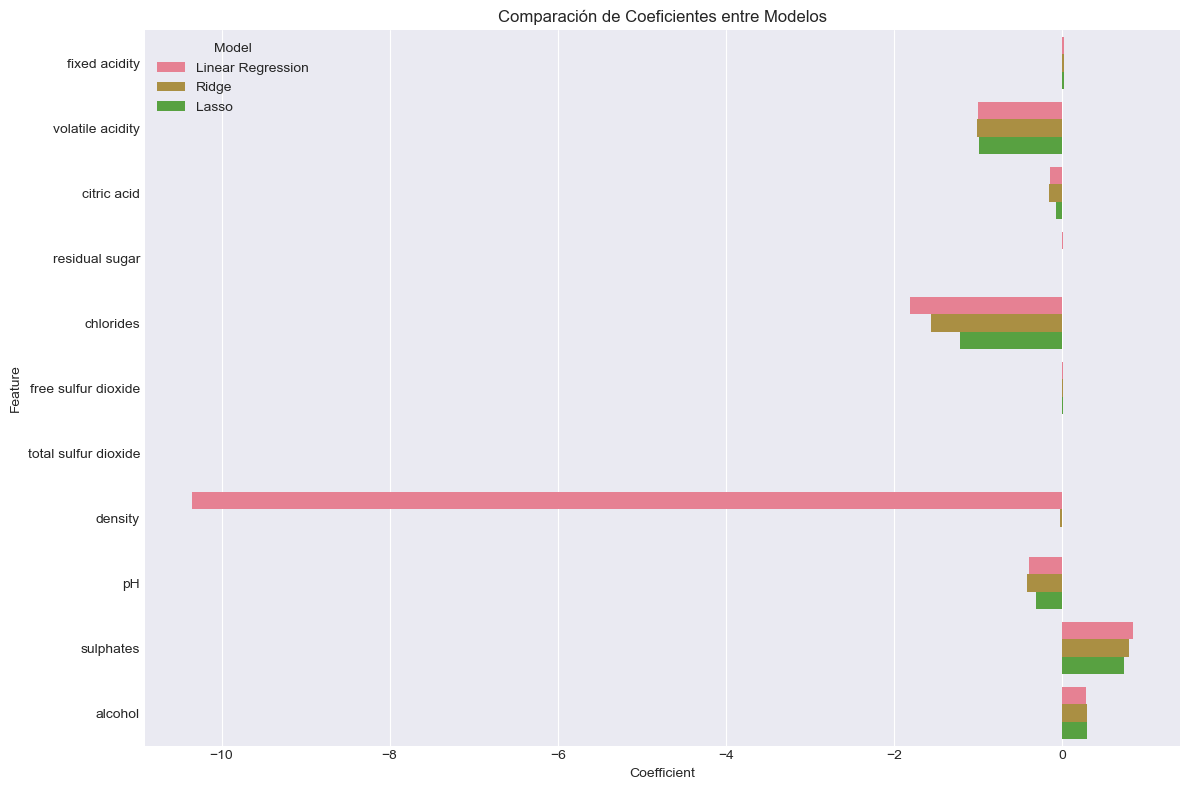

In [25]:
# TODO: Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes
# Tu código aquí
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear Regression': lr_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_cv.coef_
}).melt(id_vars='Feature', var_name='Model', value_name='Coefficient')
plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', hue='Model')
plt.title('Comparación de Coeficientes entre Modelos')
plt.tight_layout()
plt.show()

## 9. Validación Cruzada Final del Mejor Modelo

In [26]:
# TODO: Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE
# Tu código aquí
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Validación Cruzada (10 folds) del Mejor Modelo:")
print(f"Media RMSE: {cv_rmse.mean():.4f}")
print(f"Desviación Estándar RMSE: {cv_rmse.std():.4f}")

Validación Cruzada (10 folds) del Mejor Modelo:
Media RMSE: 0.6581
Desviación Estándar RMSE: 0.0386


## 10. Conclusiones y Preguntas de Reflexión

### Preguntas para responder:

1. **¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?**
   - Tu respuesta:

2. **¿Qué características son las más importantes para predecir la calidad del vino?**
   - Tu respuesta:

3. **¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?**
   - Tu respuesta:

4. **¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?**
   - Tu respuesta:

5. **¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?**
   - Tu respuesta:

6. **Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?**
   - Tu respuesta:

7. **¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?**
   - Tu respuesta:

## Ejercicio Extra: Ingeniería de Características

### Desafío:
Intenta mejorar el rendimiento del modelo creando nuevas características:

1. Crea interacciones entre variables (ej: alcohol × pH)
2. Crea características polinomiales
3. Agrupa la calidad en categorías (baja: 3-4, media: 5-6, alta: 7-8) y úsala como característica
4. Crea ratios entre características relacionadas

In [27]:
# TODO: Implementa ingeniería de características y evalúa si mejora el modelo
# Tu código aquí
